In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## 1. Feedforward: Building a ReLU neural network

### 1. Draw a network


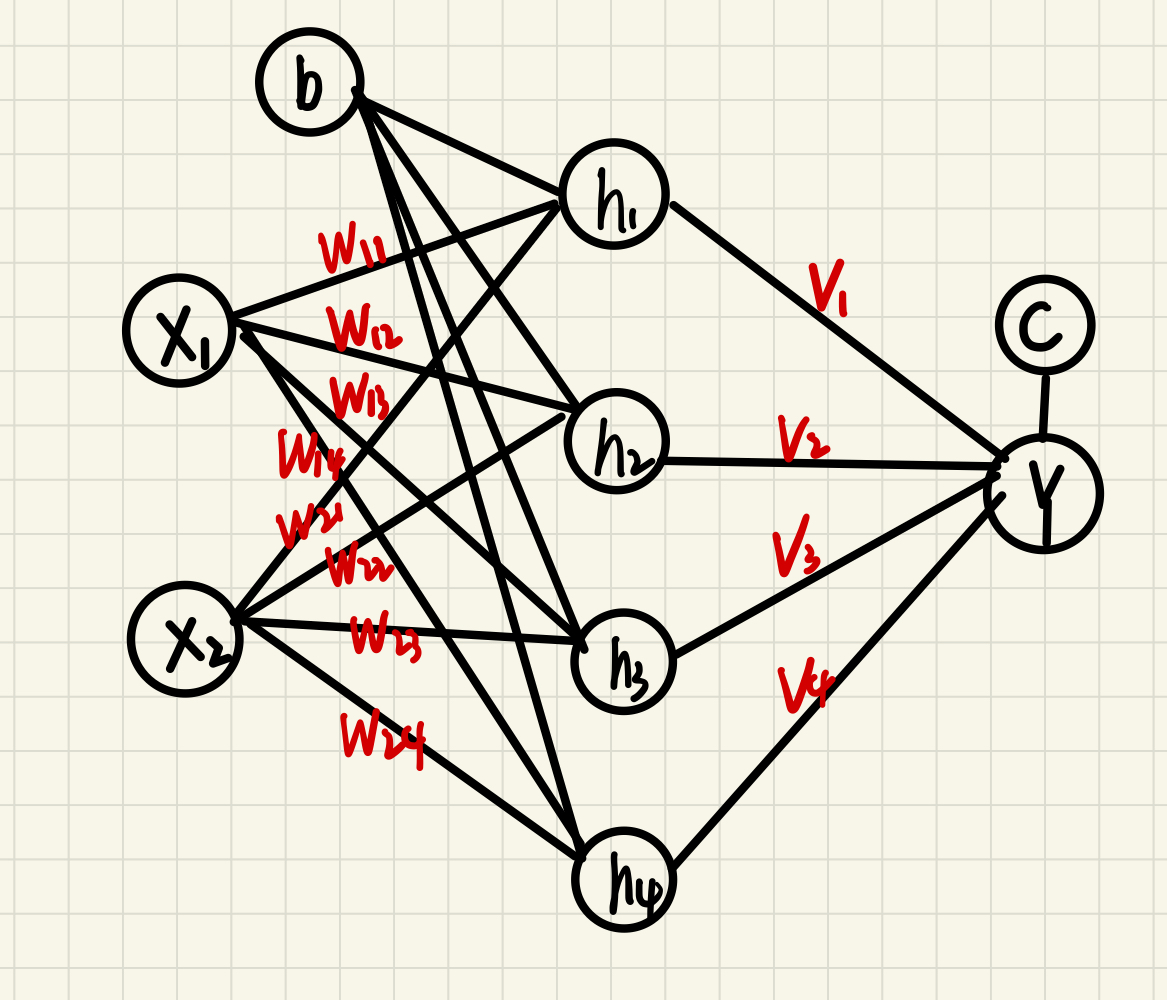

### 2. Write out the mathematical equation for the output of this network

$$h_1=max(0,w_{11}X_1+w_{21}X_2+b_1)$$

$$h_2=max(0,w_{12}X_1+w_{22}X_2+b_2)$$

$$h_3=max(0,w_{13}X_1+w_{23}X_2+b_3)$$

$$h_4=max(0,w_{14}X_1+w_{24}X_2+b_4)$$

$$Y=\frac{1}{1+e^{-(v_1h_1+v_2h_2+v_3h_3+v_4h_4+c)}}$$

### 3. Write out the forward-pass function in python

In [ ]:
def relu(z):
  return np.maximum(0, z)

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def ff_nn_Relu(x, w, b, v, c):
    H = relu(np.dot(x, w) + b)
    return sigmoid(np.dot(H, v) + c)

### 4. What are the class probabilities associated with the forward pass of each sample?

In [ ]:
x = [[1, -1], [0, -1], [0, 1]]
w = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
v = [1, 0, -1, 1]
c = [1]
ff_nn_Relu(x, w, b, v, c)

array([0.81757448, 0.62245933, 0.62245933])

## 2. Gradient Descent

### 1. What are the partial derivatives of f with respect to x and to y?

$$\frac{df}{dx}=-3x^2+100x-200y^2$$
$$\frac{df}{dy}=800y^3-400xy$$

### 2. Create a visualization of the contours of this function.

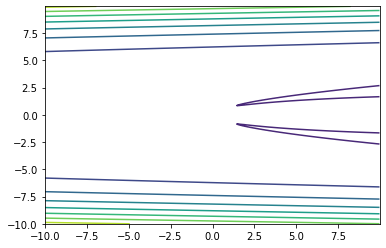

In [ ]:
delta = 0.05
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = 3 - X**3 + 50*(2*(Y**2)-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3. Write a Gradient Descent algorithm forfinding the minimum of the function.

In [ ]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2) + 100*x -200*(y**2)
    df_dy = 800*(y**3) - 400*x*y
    return np.array([df_dx, df_dy])

In [ ]:
def grad_descent(starting_point=None, iterations=10, learning_rate=1):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point = starting_point
    trajectory = [point]
            
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
        
    return np.array(trajectory)

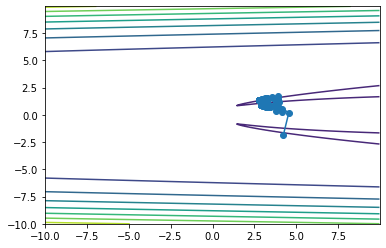

In [ ]:
traj = grad_descent(iterations=1000, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

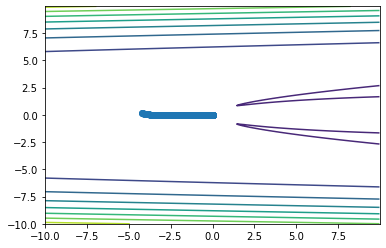

In [206]:
traj = grad_descent(iterations=1000, learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

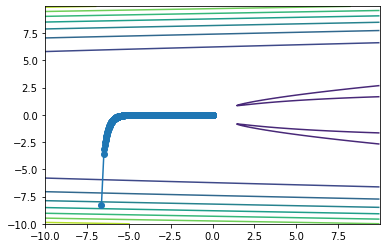

In [ ]:
traj = grad_descent(iterations=10000, learning_rate=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 4. Write a Gradient Descent With Momentum algorithm forfinding the minimum.

In [ ]:
def grad_descent_with_momentum(starting_point=None, iterations=100, alpha=.9, epsilon=1):
  if starting_point is not None:
    point = starting_point
  else:
    point = np.random.uniform(-10, 10, size=2)

  trajectory = [point]
  v = np.zeros(point.size)

  for i in range(iterations):
    grad = grad_f(point)
    v = alpha * v + epsilon * grad
    point = point - v
    trajectory.append(point)

  return np.array(trajectory)

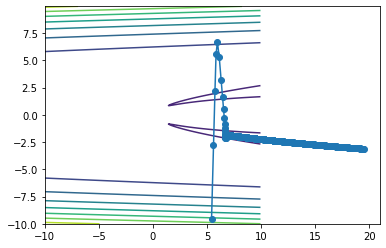

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00001, alpha=.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

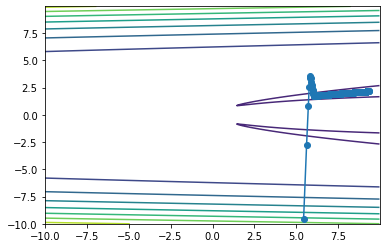

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

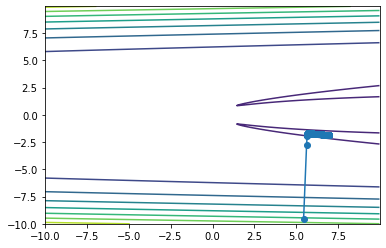

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00001, alpha=.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3. Backprop

### 1. Derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$Loss=-y_i \cdot log(\hat{y_i})-(1-y_i) \cdot log(1-\hat{y_i})$$
$$\frac{\sigma L}{\sigma c}=-(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})\cdot \frac{e^{-z}}{(1+e^{-z})^2}$$
$$\frac{\sigma L}{\sigma v_j}=-(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})\cdot \frac{e^{-z}}{(1+e^{-z})^2}\cdot h_j$$
$$\frac{\sigma L}{\sigma b_j}=-(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})\cdot \frac{e^{-z}}{(1+e^{-z})^2}\cdot v_j$$
$$\frac{\sigma L}{\sigma w_{ij}}=-(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})\cdot \frac{e^{-z}}{(1+e^{-z})^2}\cdot x_iv_j$$


### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [207]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def relu_derivative(x):
    return np.where(x>0, 1, 0)


def params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    w = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((w, b, v, c))


In [208]:
def grad_f(param_vec, x, y):
    
    w, b, v, c = params(param_vec)
    
    # forward pass
    a = np.dot(x, w) + b
    h = relu(a)
    y_hat = sigmoid(np.dot(h, v) + c)
    dLoss = y/y_hat - (1-y)/(1-y_hat)
    
    # backward pass
    dL_dc = dLoss.dot( y_hat*(1-y_hat) ) 
    dL_dv = (dLoss * y_hat*(1-y_hat)).T.dot(h) 
    dL_db = (dLoss * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
    dL_dw = x.T.dot(np.expand_dims((dLoss * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3], dL_db[0], dL_db[1], dL_db[2], dL_db[3], dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y)

### 3. Generate a synthetic dataset like the XOR pattern

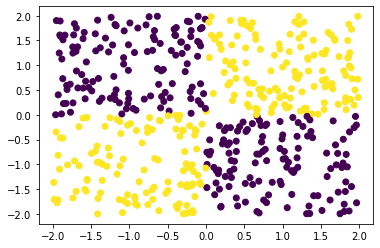

In [209]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:, 0], x[:, 1], c=y)

### 4. Fit your network using Gradient Descent.

In [210]:
start = np.array([w[0][0],w[0][1], w[0][2], w[0][3], w[1][0], w[1][1], w[1][2], w[1][3], b[0], b[1], b[2], b[3], v[0], v[1], v[2], v[3], c[0]])
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = start
    trajectory = [point]
    losses = [loss(y, ff_nn_Relu(x, *params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_Relu(x, *params(point))))
    return (np.array(trajectory), losses)

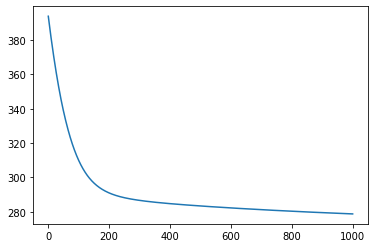

In [220]:
traj, losses = grad_descent(x, y, iterations=1000, learning_rate=0.01)
plt.plot(losses)
plt.show()

### 5. Repeat the exercise above using Momentum.

In [217]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=17)

    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, ff_nn_Relu(x, *params(point)))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_Relu(x, *params(point))))

    return (np.array(trajectory), losses)

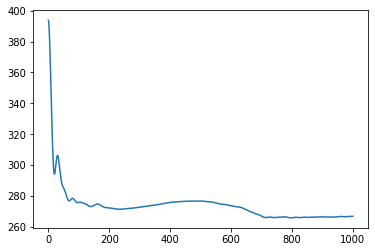

In [218]:
traj, losses = grad_descent_with_momentum(x, y, start, iterations = 1000, alpha =0.95, epsilon=0.01)
plt.plot(losses)

### 6. Plot a visualization of the nal decision boundary that your model has learned. Overlay the datapoints in this plot.

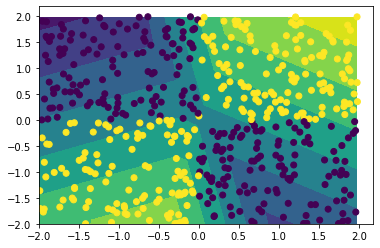

In [219]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
y_hat = ff_nn_Relu(np.array((X1.ravel(),X2.ravel())).T, *params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, y_hat)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()